In [132]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [133]:
path="https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
colname=["sepal length","sepal width","petal length","petal width","class"]
df = pd.read_csv(path,header=None, names=colname)
df.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [134]:
df.info()

data = df.drop_duplicates(subset ="class",) 
data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
50,7.0,3.2,4.7,1.4,Iris-versicolor
100,6.3,3.3,6.0,2.5,Iris-virginica


In [135]:
df.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [136]:
df["class"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

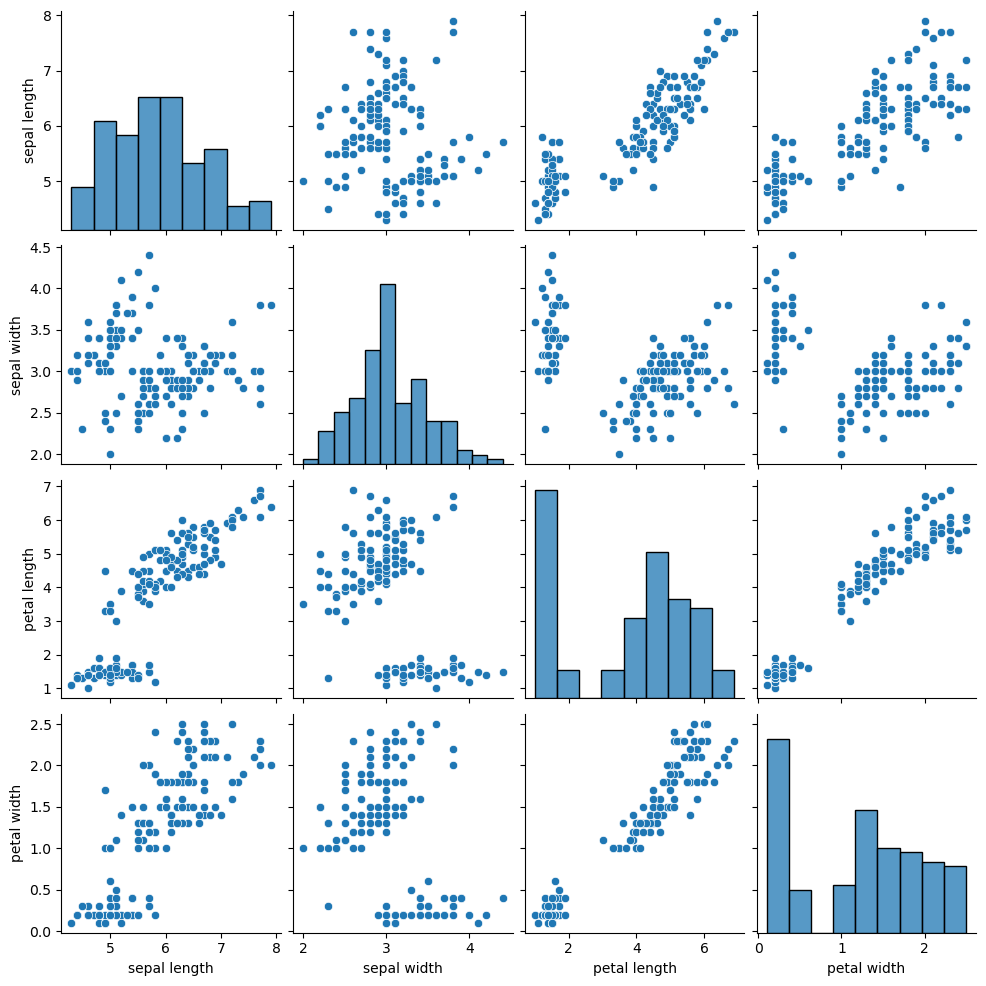

In [137]:
sns.pairplot(df)

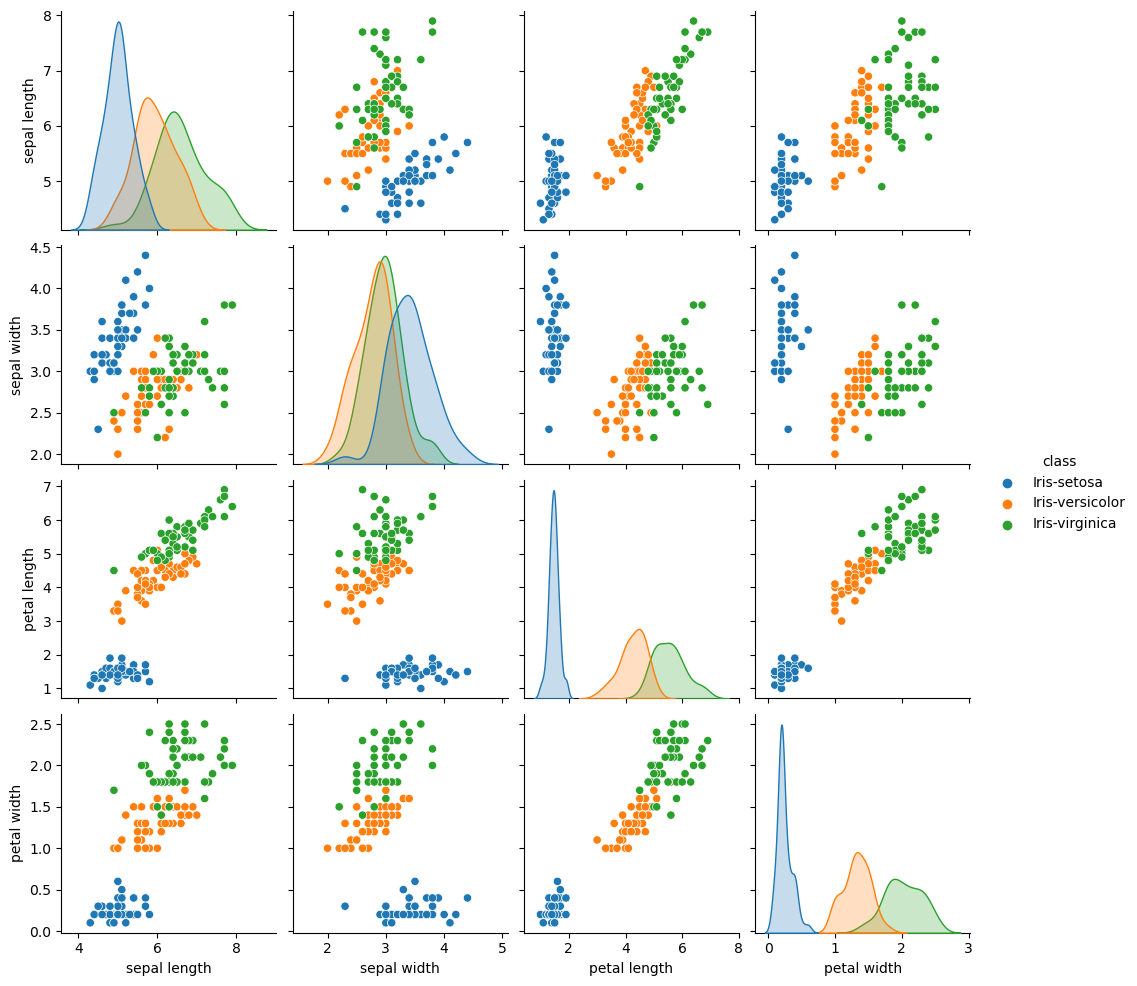

In [138]:
sns.pairplot(data=df,hue="class")

In [139]:
df['class']


0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: class, Length: 150, dtype: object

In [140]:
df.groupby("class").size()


df.value_counts("class")

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

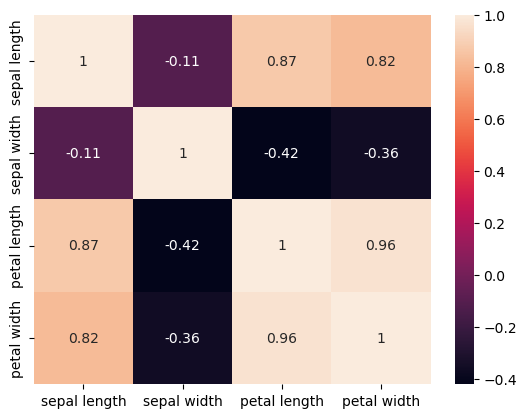

In [144]:
data.corr(method='pearson')

sns.heatmap(df.corr(method='pearson'),annot = True); 

In [ ]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)

In [ ]:
y

In [ ]:
from sklearn.model_selection import train_test_split as ts
xtrain, xtest, ytrain, ytest = ts(x,y, test_size=0.3, 
                                                random_state=1)

In [ ]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(xtrain,ytrain)
ypred=svm.predict(xtest)


In [ ]:
from sklearn.linear_model import LinearRegression 
lr=LinearRegression()
lr.fit(xtrain,ytrain)
ypred1=lr.predict(xtest)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred))

In [ ]:
train=svm.score(xtrain,ytrain)
test=svm.score(xtest,ytest)
print(train,"\n",test)

In [ ]:
train=lr.score(xtrain,ytrain)
test=lr.score(xtest,ytest)
print(train,"\n",test)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [ ]:
pipe = Pipeline(
    steps=[
        ("scaler", StandardScaler()),
        ("svm", SVC())
    ]
)

In [95]:
pipe1 = Pipeline(
    steps=[
        ("scaler", StandardScaler()),
        ("lr", LinearRegression())
    ]
    
)

In [153]:
pipe.fit(xtrain,ytrain)
ypred=pipe.predict(xtest)

In [ ]:
pipe1.fit(xtrain,ytrain)
ypred1=pipe1.predict(xtest)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred))


In [155]:
train = pipe.score(xtrain, ytrain)
test = pipe.score(xtest, ytest)
print(train,"\n",test)

0.9359125894643273 
 0.9082844376254666


In [156]:
pm = {
    "C": [0.1, 1, 10],
    "gamma": [0.1, 0.01, 0.001],
    "kernel": ["rbf"]
}

In [157]:
from sklearn.model_selection import GridSearchCV

gd = GridSearchCV(SVC(), pm, verbose=3)
gd.fit(xtrain, ytrain)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.905 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.952 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.905 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.857 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.810 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.714 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.714 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.714 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.667 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.667 total time=   0.0s
[CV 1/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.714 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=0.001, kernel=rbf;,

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': [0.1, 0.01, 0.001],
                         'kernel': ['rbf']},
             verbose=3)

In [158]:
gd.best_params_

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

In [159]:
gd.best_score_

0.9714285714285715

In [160]:
gd.best_estimator_

SVC(C=10, gamma=0.1)

In [162]:
svm=SVC